импорт всех нужных библиотек

In [1]:
from sklearn.model_selection import train_test_split
import torch
import sys
import os
from model import Trainer,QuantumModel

import matplotlib.pyplot as plt
#путь к корню директории
#from setting import BASE_DIR
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.abspath(BASE_DIR))
from data_preparation import PreparationDataset
from show_analysis import LossVisualizer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


Загрузка и подготовка данных для анализа и обучения модели.<br>
разбиение на train,test


In [2]:
path = BASE_DIR + '\data_all'  # Путь к данным
PD = PreparationDataset(path)

# параметры подготовки данных
pd_params = (10,9,50,1)
window_size,num_features,downsample_step,target_window_size = pd_params 

# Подготовка данных
X, y, df = PD.vec_to_vec(
    window_size,
    num_features,
    downsample_step,
    target_window_size,
    device=device  
)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [3]:
#инициализация модели
model = QuantumModel( 
    in_features = X_train.shape[1], # window_size*num_features - 1
    out_features = target_window_size,
    head = 1,
    hid_q=64,
    hid_l=128,
    dropout_rate=0.1,
    device = device)

trainer = Trainer(
    model=model,
    learning_rate=0.001,
    device= device
)

In [4]:
history = trainer.fit(
    X=X_train,
    y=y_train,
    X_t=X_test,
    y_t=y_test,
    batch_size=32,
    epochs=50,
    loss_tube=5
)

Epoch 10
Main: 0.376748, MAPE: 0.180114
Test - MAPE: 0.129480, Tube: 0.251932
Epoch 40
Main: 0.279443, MAPE: 0.118928
Test - MAPE: 0.101132, Tube: 0.259948


In [5]:
LV = LossVisualizer(history)

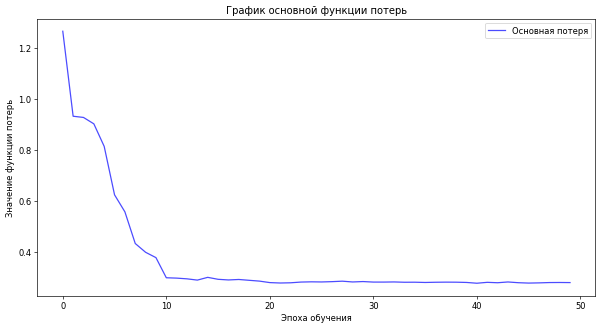

In [6]:
LV.show_training_loss()

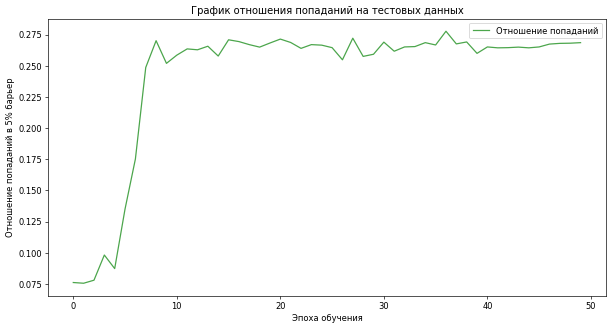

In [7]:
LV.show_test_tube()

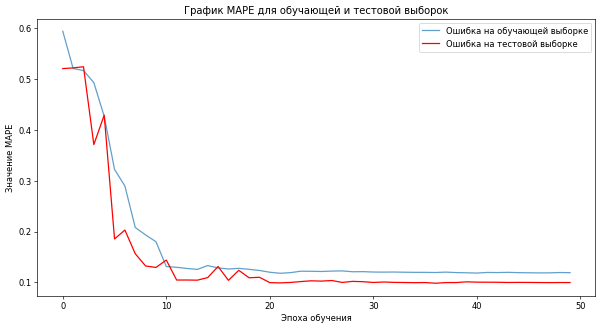

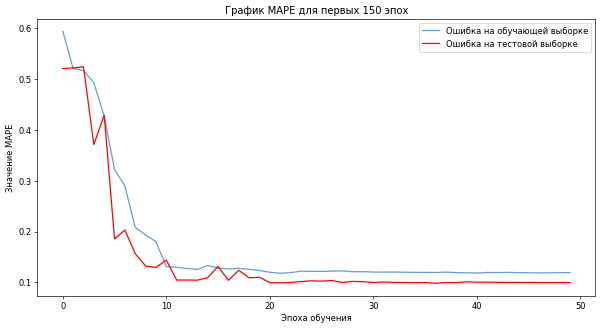

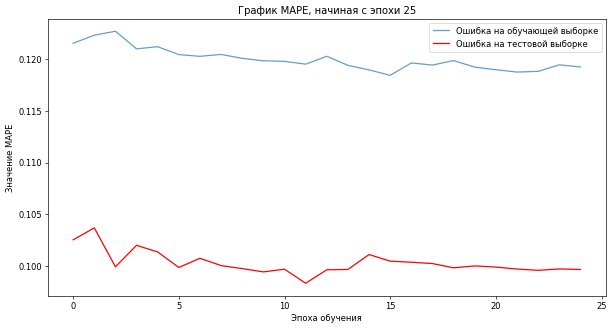

In [8]:
LV.show_mape(start_epoch = 25)

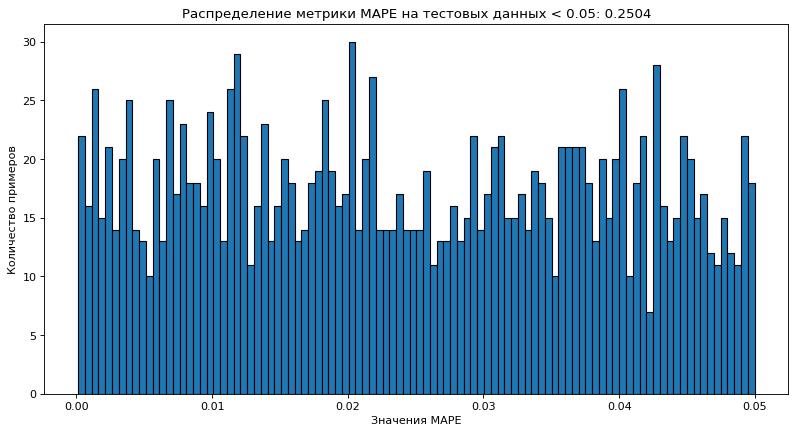

Процент значений MAPE < 0.05: 0.2504


In [9]:
LV.histogram_mape(model,X_test,y_test,limit_percel = 5)

Количество записей: 5334


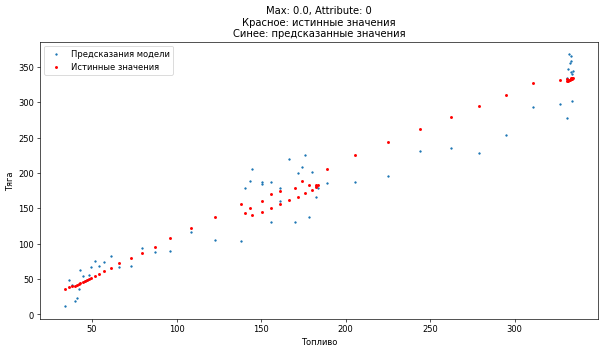

Количество записей: 5334


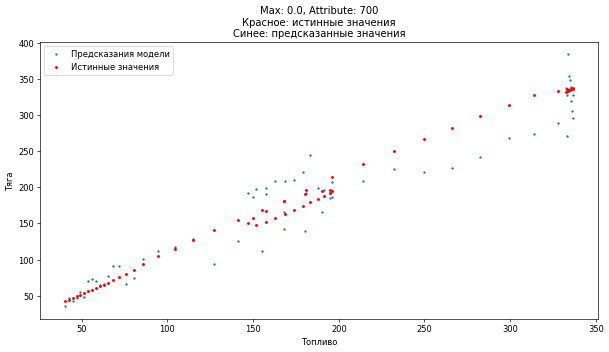

Количество записей: 5334


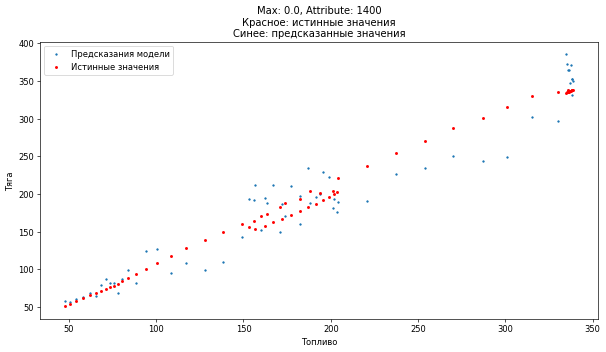

Количество записей: 5334


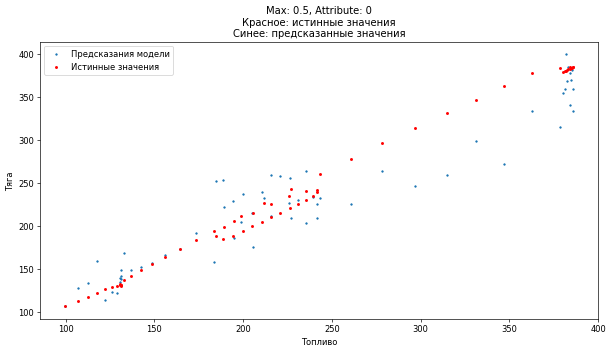

Количество записей: 5334


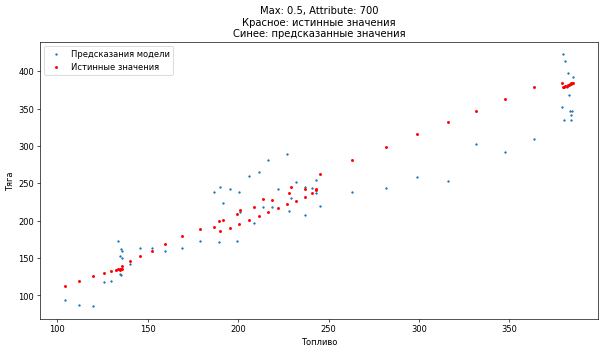

Количество записей: 5334


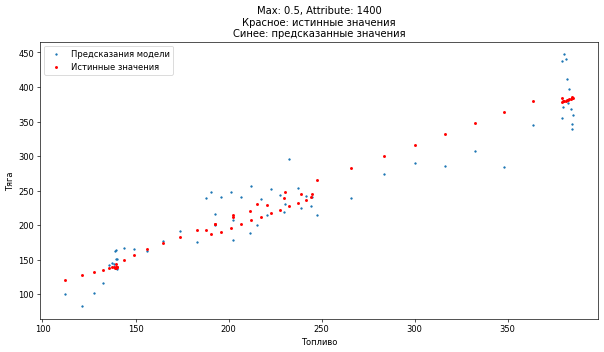

Количество записей: 5334


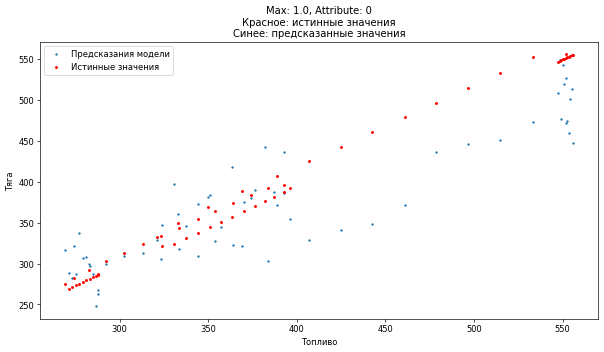

Количество записей: 5334


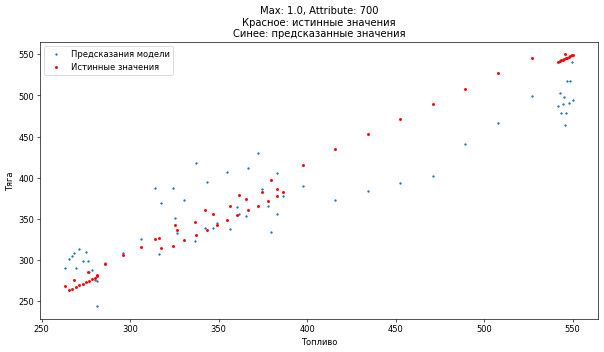

Количество записей: 5334


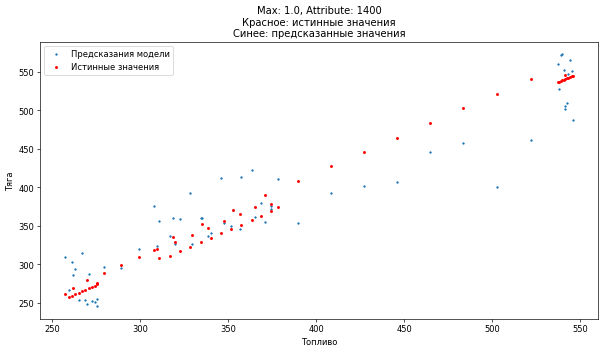

In [10]:
LV.show_predictions(model,df,pd_params,device)